### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

### 2. Import dataset 

In [2]:
df = pd.read_csv("NB2.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 3. Explore the data to gain insights about the data 

In [3]:
df.shape

(9578, 14)

Rename column names

In [4]:
df = df.set_axis(['credit', 'purpose', 'rate', 'installment', 'inc', 'dti', 'fico', 'cr', 'bal', 'util', 'inq', 'delinq', 'rec', 'paid'], axis='columns')
df.head()

,credit,purpose,rate,installment,inc,dti,fico,cr,bal,util,inq,delinq,rec,paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Explore categorical variables and view them

In [5]:
numCol = list(df._get_numeric_data().columns)
catCol = list(set(df.columns) - set(numCol))
print(catCol)
print(numCol)

['purpose']
['credit', 'rate', 'installment', 'inc', 'dti', 'fico', 'cr', 'bal', 'util', 'inq', 'delinq', 'rec', 'paid']


Check missing values in categorical variables

In [6]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.replace('?', np.nan)
for col in catCol:
    print(col, '=', df[col].isnull().sum())

purpose = 0


View frequency count and distribution

In [7]:
for col in catCol:
    print(col, '\n', df[col].value_counts(), '\n')

purpose 
 purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64 



Missing values

In [8]:
df.isnull().sum()

credit         0
purpose        0
rate           0
installment    0
inc            0
dti            0
fico           0
cr             0
bal            0
util           0
inq            0
delinq         0
rec            0
paid           0
dtype: int64

Explore numerical values

In [9]:
for col in numCol:
    print(col, '\n', df[col].value_counts(), '\n')

credit 
 credit
1    7710
0    1868
Name: count, dtype: int64 

rate 
 rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: count, Length: 249, dtype: int64 

installment 
 installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: count, Length: 4788, dtype: int64 

inc 
 inc
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: count, Length: 1987, dtype: int64 

dti 
 dti
0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
         ..
5.90      1
19.74     1
29.15     1
1.09      1
24.05     1
Name: count, Length: 2529, dtype: int64 

fico 
 fico
687    548
682    536
692    498
697    476
702    472
707    444
667    438
677   

In [10]:
for col in numCol:
    print(col, '=', df[col].isnull().sum())

credit = 0
rate = 0
installment = 0
inc = 0
dti = 0
fico = 0
cr = 0
bal = 0
util = 0
inq = 0
delinq = 0
rec = 0
paid = 0


### 4. Declare feature vector and target variable 

In [11]:
x = df.drop('paid', axis=1)
y = df['paid']
print(x)
print(y)

      credit             purpose    rate  installment        inc    dti  fico  \
0          1  debt_consolidation  0.1189       829.10  11.350407  19.48   737   
1          1         credit_card  0.1071       228.22  11.082143  14.29   707   
2          1  debt_consolidation  0.1357       366.86  10.373491  11.63   682   
3          1  debt_consolidation  0.1008       162.34  11.350407   8.10   712   
4          1         credit_card  0.1426       102.92  11.299732  14.97   667   
...      ...                 ...     ...          ...        ...    ...   ...   
9573       0           all_other  0.1461       344.76  12.180755  10.39   672   
9574       0           all_other  0.1253       257.70  11.141862   0.21   722   
9575       0  debt_consolidation  0.1071        97.81  10.596635  13.09   687   
9576       0    home_improvement  0.1600       351.58  10.819778  19.18   692   
9577       0  debt_consolidation  0.1392       853.43  11.264464  16.28   732   

                cr     bal 

### 5. Split data into separate training and test set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 6. print the percentage of missing values in the categorical variables in the training set

In [13]:
for col in catCol:
    print(col, '=', x_train[col].isnull().sum() * 100 / x_train[col].count())

purpose = 0.0


### 7. print categorical variables with missing data

In [14]:
for col in catCol:
    if (x[col].isnull().sum() != 0):
        print(col, '=', x[col].isnull().sum())

### 8. impute missing categorical variables with the most frequent value

In [15]:
x_train = x_train.apply(lambda x: x.fillna(x.value_counts().index[0]))
x_test = x_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

### 9. Encode categorical variables

In [16]:
le = LabelEncoder()
for col in catCol:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### 10. Feature Scaling

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 11. Model training

In [18]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

### 12. Predict the results

In [19]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)
print(y_pred_test)

[1 0 0 ... 0 0 0]


### 13. Check the accuracy score

In [20]:
acc_test = accuracy_score(y_test, y_pred_test)
print(acc_test)

0.7922755741127349


### 14. Compare the train-set and test-set accuracy

In [21]:
acc_train = accuracy_score(y_train, y_pred_train)
print("Train Accuracy =", acc_train)
print("Test Accuracy =", acc_test)

Train Accuracy = 0.7896778042959427
Test Accuracy = 0.7922755741127349


### 15. Visualize confusion matrix with seaborn heatmap

<Axes: >

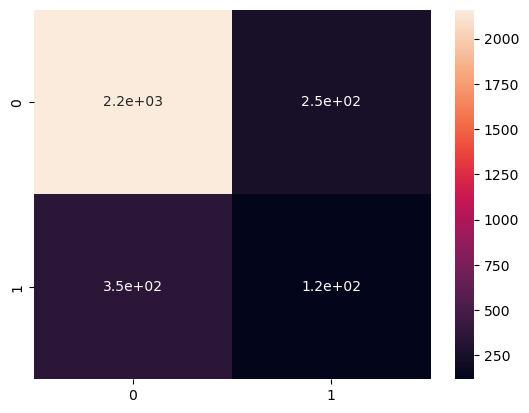

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

### 16. Generate Classification Report

In [23]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2408
           1       0.32      0.25      0.28       466

    accuracy                           0.79      2874
   macro avg       0.59      0.57      0.58      2874
weighted avg       0.77      0.79      0.78      2874



### 17. Evaluate Classification accuracy

In [24]:
print("Classification accuracy =", acc_test)

Classification accuracy = 0.7922755741127349


### 18. Evaluate Classification error

In [25]:
print("Classification error =", 1 - acc_test)

Classification error = 0.20772442588726514


### 19. Calculate class probabilities and store the probabilities in data frame with appropriate heading

In [26]:
class_prob = gnb.predict_proba(x_test)
class_prob_df = pd.DataFrame(class_prob, columns=gnb.classes_)
print(class_prob_df)

             0         1
0     0.468372  0.531628
1     0.958065  0.041935
2     0.939285  0.060715
3     0.492612  0.507388
4     0.977624  0.022376
...        ...       ...
2869  0.549830  0.450170
2870  0.957853  0.042147
2871  0.809260  0.190740
2872  0.814337  0.185663
2873  0.970897  0.029103

[2874 rows x 2 columns]


### 20. Plot histogram of predicted probabilities

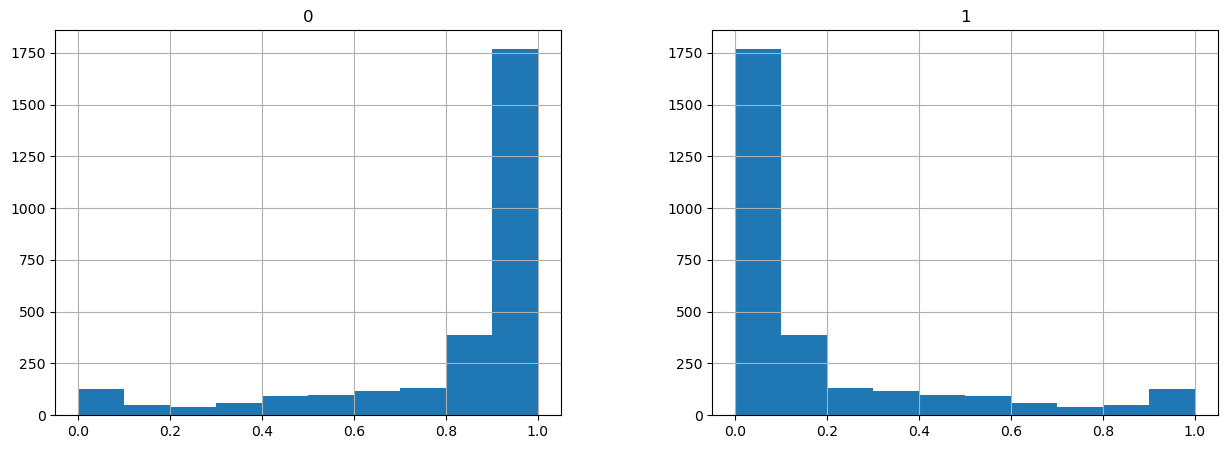

In [27]:
class_prob_df.hist(figsize=(15,5))
plt.show()

### 21. Plot ROC Curve

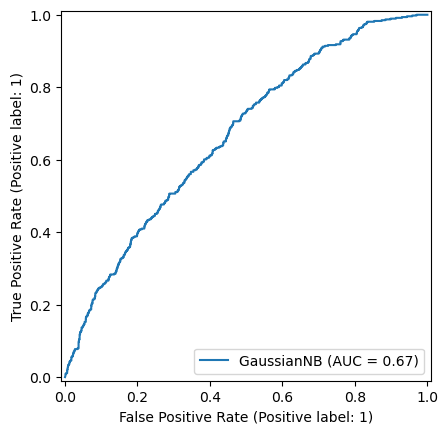

In [28]:
gnb_disp = RocCurveDisplay.from_estimator(gnb, x_test, y_test)

### 22. Compute ROC AUC

In [29]:
roc_auc_score(y_test, class_prob[:, 1])

0.6660817660730327

### 23. Calculate cross-validated ROC AUC

In [30]:
x_test_df = pd.DataFrame(x_test)
x_train_df = pd.DataFrame(x_train)
y_test_df = pd.Series(y_test)
y_train_df = pd.Series(y_train)

x = pd.concat([x_test_df, x_train_df])
y = pd.concat([y_test_df, y_train_df])

In [31]:
cross_val_scores = cross_val_score(gnb, x, y, cv=5, scoring='roc_auc')
print(cross_val_scores)

[0.68295297 0.64488838 0.66982345 0.6593904  0.64608188]


### 24. Applying 10-Fold Cross Validation

In [32]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cross_val_scores = cross_val_score(gnb, x, y, cv=cv, scoring='roc_auc')
print(cross_val_scores)

[0.63623188 0.64846344 0.70064548 0.69661024 0.68769537 0.62613879
 0.6826016  0.64209795 0.64218125 0.66564238]


### 25. Compute the Average cross-validation score

In [33]:
cross_val_scores.mean()

0.662830837701529